## Logistic Regression
- Is a statistical method used for binary classification problems, where the outcome variable is categorical and has only two classes.
- 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


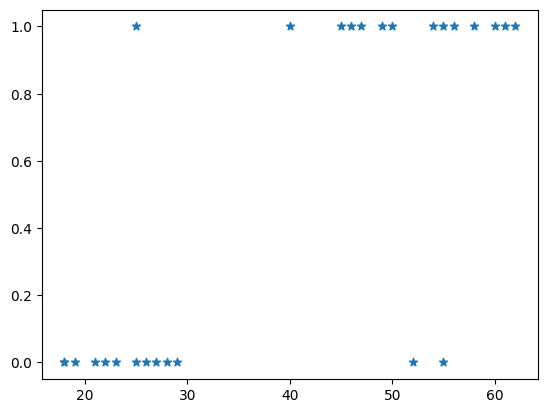

In [6]:
plt.scatter(df.age, df.bought_insurance, marker='*')

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size=0.2, random_state=42)


In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
y_pred

array([1, 0, 1, 0, 0, 0], dtype=int64)

In [13]:
y_test

8     1
13    0
9     1
21    0
0     0
11    0
Name: bought_insurance, dtype: int64

In [15]:
model.score(X_test, y_test)

1.0

- Logistic regression uses the logisitc function to model the probability that a given input to a particular class.
- The sigmoid function is an S-shaped curve that maps any real-valued number to the range [0,1]
- The formula for the sigmoid function is z = 1/1+e^-z

In [16]:
model.intercept_

array([-4.15312723])

## Multiclass Classification

In [17]:
from sklearn.datasets import load_digits


In [18]:
digits = load_digits()


<Figure size 640x480 with 0 Axes>

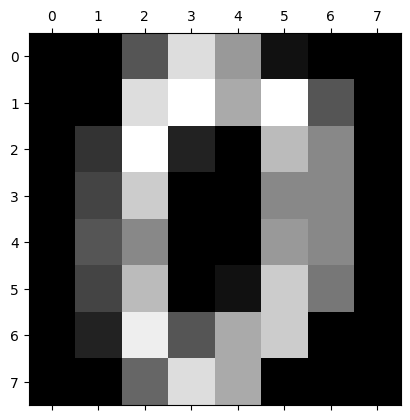

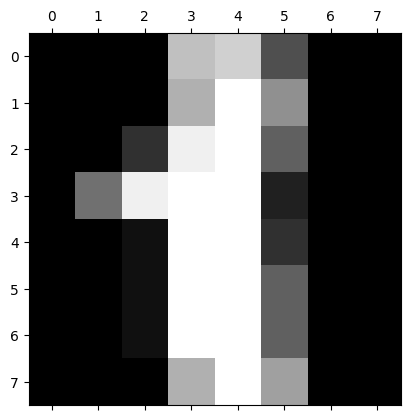

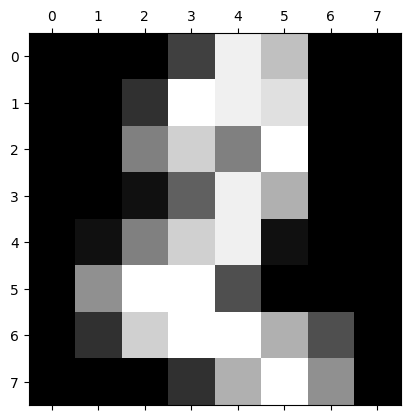

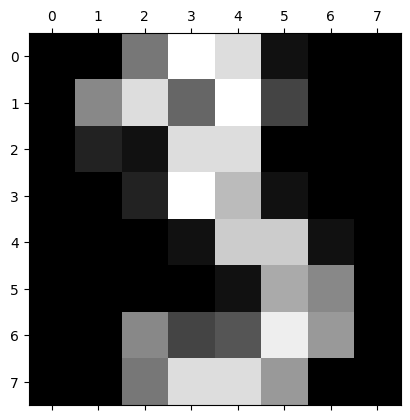

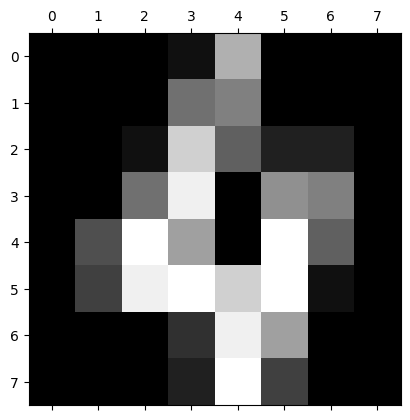

In [19]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [20]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [22]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [23]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)


In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Felix\.conda\envs\deeplearning\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
model.score(X_test, y_test)

0.9694444444444444

In [29]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [30]:
y_preds = model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 44,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 44,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]], dtype=int64)

Text(95.72222222222221, 0.5, 'truth')

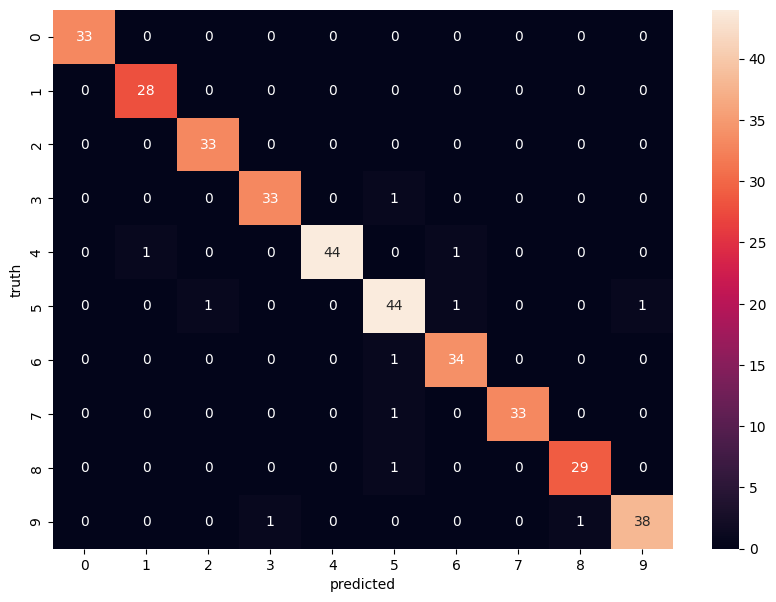

In [35]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")